# Author : Ashish Uike
**Task 2 - Prediction using unsupervised machine learning**


 From the given dataset predict the optimum number of clusters and represent it visually. 


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Data collection and preprocessing**

In [ ]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
pd.set_option('display.max_rows', None) # to see all rows

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Exploratory data analysis**

In [ ]:
#getting the shape of dataset
df.shape

(150, 6)

In [ ]:
#To Show attributes
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# information about data types
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# insights about the descriptive statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# getting info about the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df = df.drop(['Id'], axis =1)

In [ ]:
# now check if there is any null value is present or not
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# also check the duplicate values if any
df.duplicated().sum()


3

In [ ]:
# remove duplicated values
df.drop_duplicates(inplace = True)
df.shape

(147, 5)

**Data Visualisation**

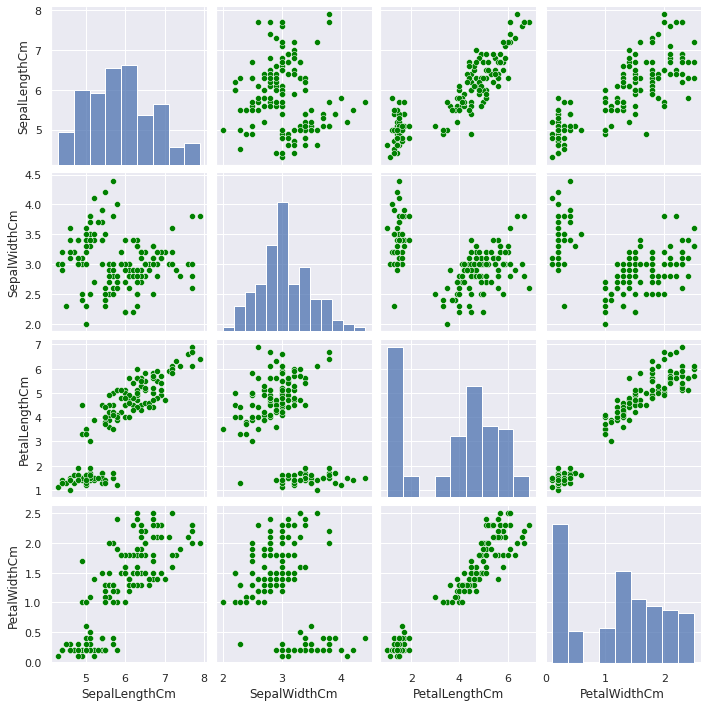

In [ ]:
sns.pairplot(df, plot_kws = {"color": "green"})

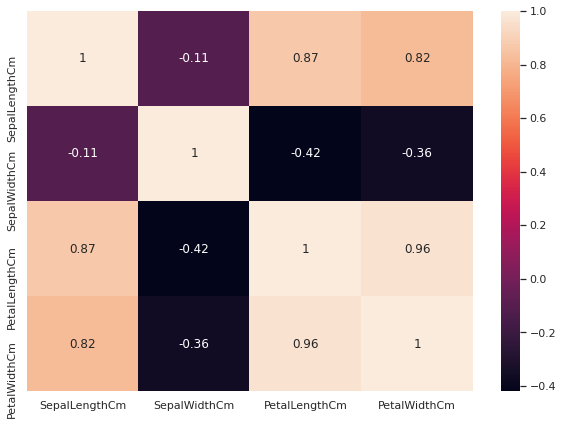

In [ ]:
# generate heatmap
plt.figure(figsize=(10,7))
corrn = df.corr()
sns.heatmap(corrn,annot = True)

**Data Preprocessing**

In [ ]:
X = df.iloc[:,0:4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [ ]:
y = df['Species']

**Now we have to choose an optimum no. of clusters using WCSS**

In [ ]:
# finding WCSS differnt no. of clusters
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = "k-means++", random_state=42)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

In [ ]:
WCSS

[663.895238095238,
 151.77145833333336,
 77.91989035087718,
 56.64237065018315,
 45.836345238095234,
 38.65691713471713,
 34.29663892958893,
 29.788370882190108,
 27.9695088013838,
 25.858146367521364]

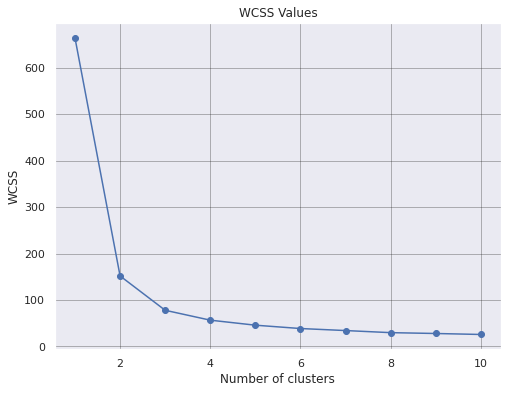

In [ ]:
# Now pot the elbow graph to show which having the minimum WCSS values
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,11),WCSS,marker = "o")
plt.title("WCSS Values")
plt.ylabel("WCSS")
plt.xlabel("Number of clusters")
plt.grid(color = 'k',alpha = 0.3)
plt.show()

**training the model using k-means clustering**

In [ ]:
kmeans = KMeans(n_clusters=3,init = "k-means++",random_state=42)

In [ ]:
#return label for each of data points
ypred = kmeans.fit_predict(X)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Visualising the clusters

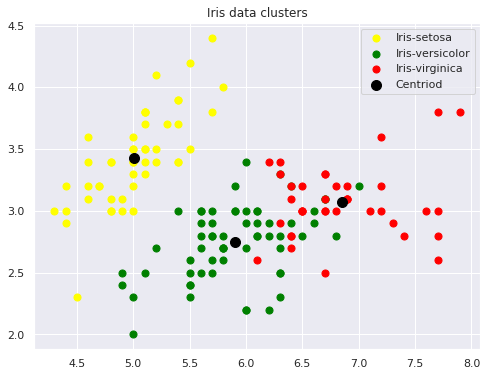

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x = X[ypred==0,0], y = X[ypred==0,1], s=50,c = 'yellow',label = 'Iris-setosa')
plt.scatter(x = X[ypred==1,0], y = X[ypred==1,1], s=50,c = 'green',label = 'Iris-versicolor')
plt.scatter(x = X[ypred==2,0], y = X[ypred==2,1], s=50,c = 'red',label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='black', label = 'Centriod')
plt.title('Iris data clusters')
plt.legend()
plt.show()

# So the optimum no. of cluster are 3 !!